<a href="https://colab.research.google.com/github/anheejeong/MachineLearning_Basic/blob/main/%08fourth_machineLearning_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

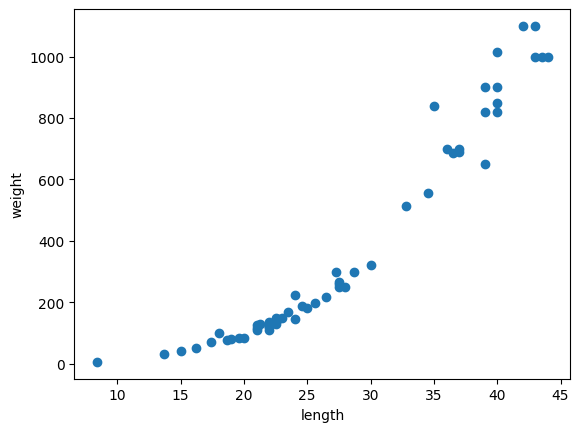

In [4]:
plt.scatter(perch_length, perch_weight) # perch_weight => target data
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 훈련 세트 준비

In [5]:
from sklearn.model_selection import train_test_split

# 회귀 문제에서는 stratify 사용 x
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [6]:
test_array = np.array([1,2,3,4])
print(test_array, test_array.shape)

[1 2 3 4] (4,)


In [7]:
test_array = test_array.reshape(2, 2) # 배열 형태 변경
print(test_array, test_array.shape)

[[1 2]
 [3 4]] (2, 2)


In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 회귀 모델 훈련 - 결정 계수 (R²)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
knr.score(test_input, test_target)

0.992809406101064

R² = 1 - ((타깃 - 예측)^2의 합) / (타깃 - 평균)^2의 합)
<br>
0~1 사이의 값, 1에 가까워질수록 좋은 모델

In [12]:
from sklearn.metrics import mean_absolute_error

# test_input으로 예측한 값
test_prediction = knr.predict(test_input)
# 차이 절대값(오차)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [13]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [14]:
print(knr.score(test_input, test_target))

0.992809406101064


훈련 세트를 제대로 학습하지 못함 => 과소적합
<br>
k 개수를 늘리면 과소적합, k 개수를 줄이면 과대적합

## 이웃 개수 줄이기

In [15]:
# 기본값 : 5
knr.n_neighbors = 3
# 재학습
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


## 확인 문제

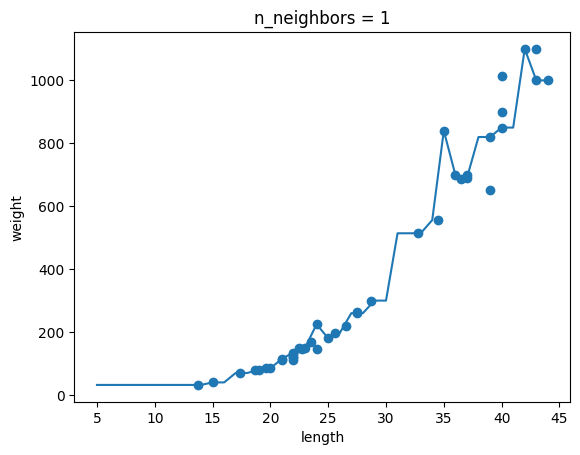

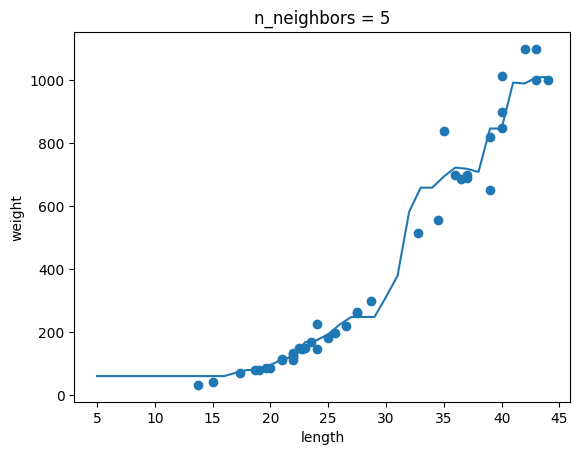

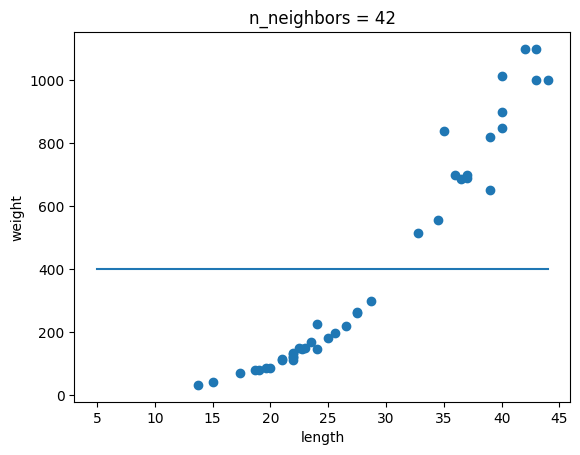

In [17]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과 그래프로 표시
for n in [1, 5, 42]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()